        Gesture  Feature1  Feature2  Feature3  Feature4  Feature5
0      thumb_up  0.294449  0.116898  0.796537  0.535310  0.093857
1      zoom_out  0.385098  0.939832  0.481522  0.215202  0.909627
2          fist  0.851137  0.627708  0.117308  0.012121  0.669200
3      thumb_up  0.316922  0.334906  0.125186  0.241201  0.829287
4       zoom_in  0.169493  0.139272  0.685565  0.975874  0.878979
..          ...       ...       ...       ...       ...       ...
495    thumb_up  0.899575  0.626220  0.481344  0.521446  0.781322
496     zoom_in  0.383891  0.131245  0.019192  0.063641  0.578298
497    zoom_out  0.543553  0.032526  0.259813  0.831374  0.146963
498  swipe_left  0.906472  0.920848  0.760290  0.598979  0.811124
499    zoom_out  0.624238  0.616650  0.137110  0.114933  0.635955

[500 rows x 6 columns]
Accuracy: 0.15
Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.20      0.23        20
           1       0.25      0.21    

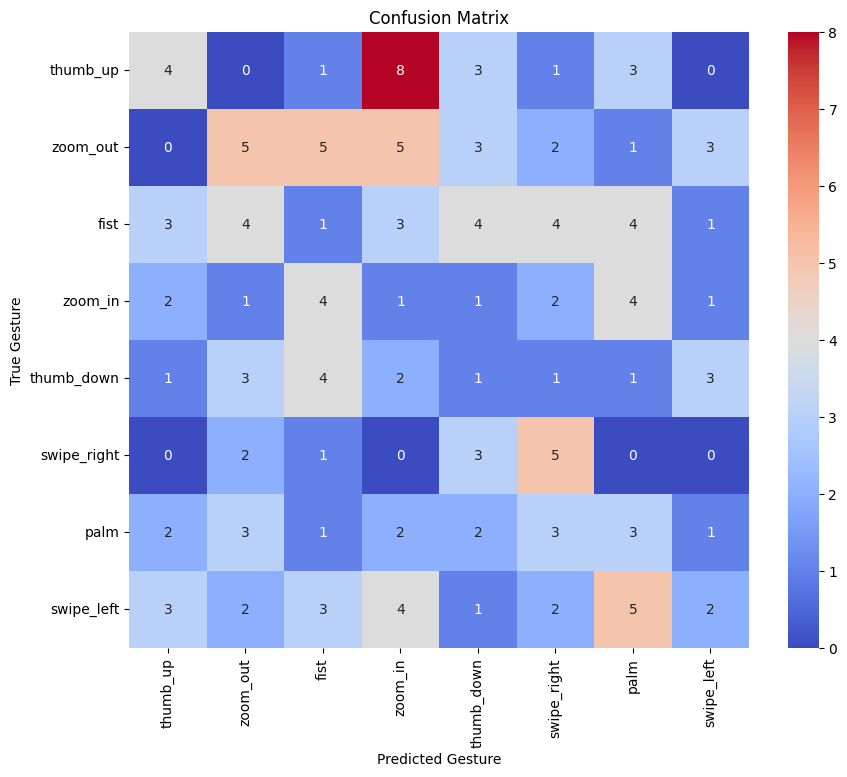

<Figure size 1200x800 with 0 Axes>

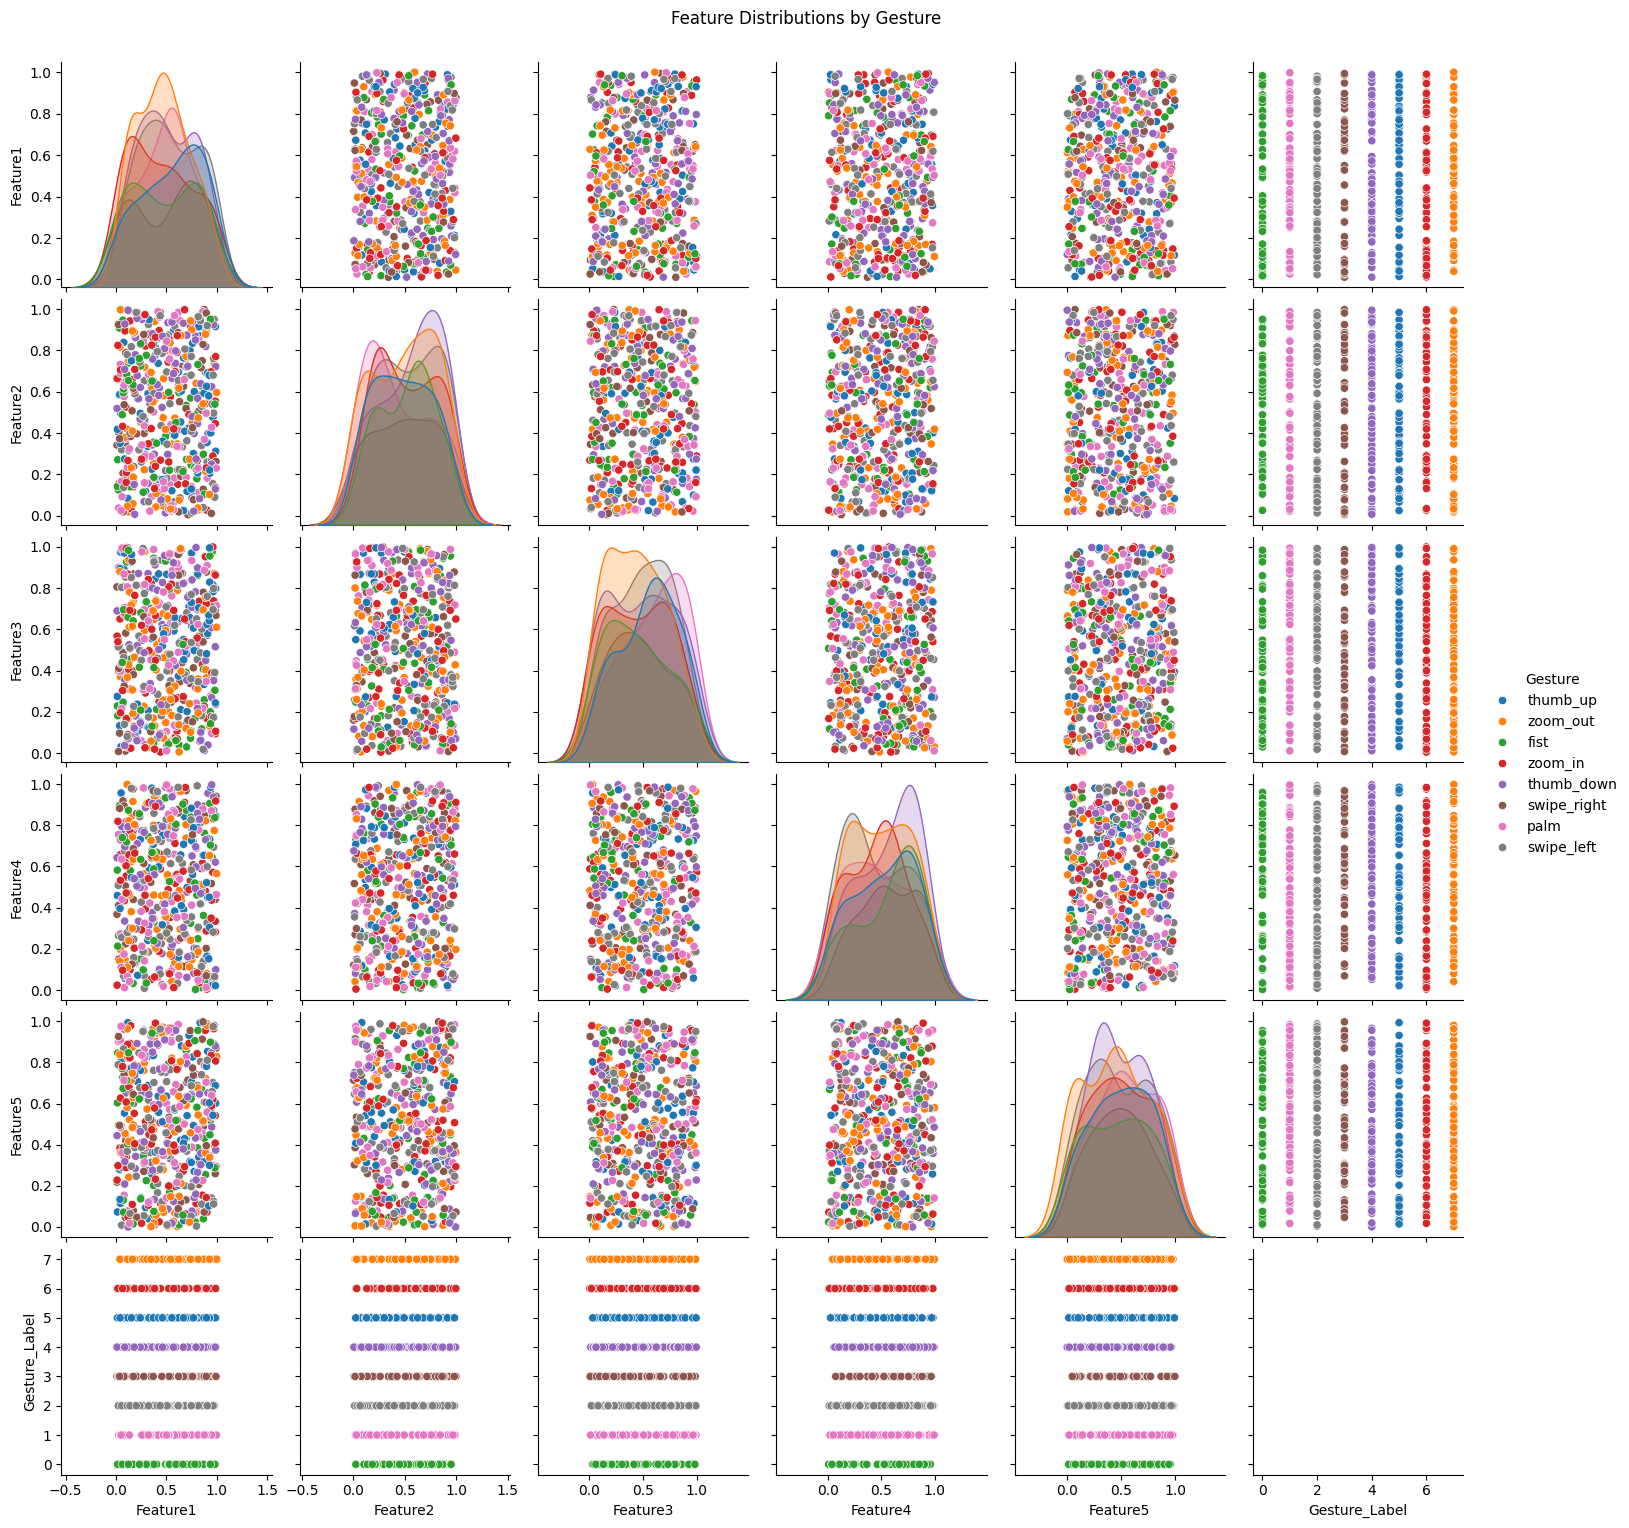

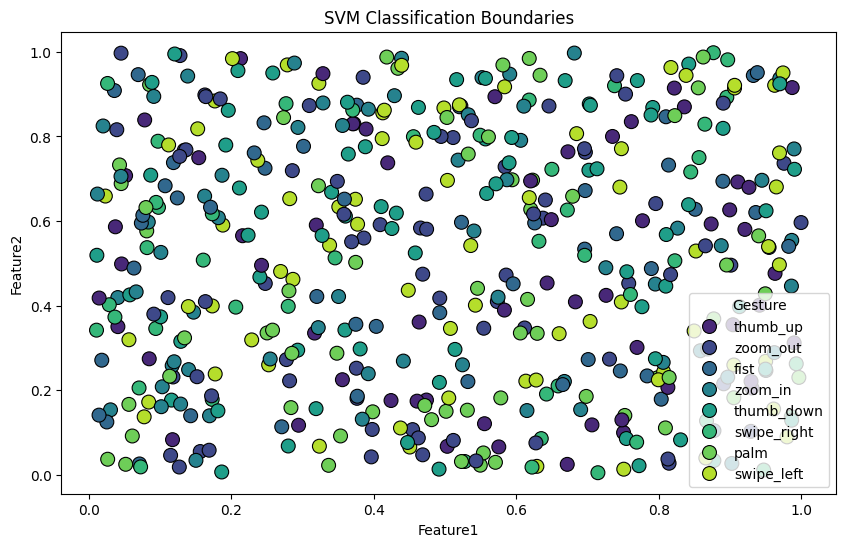

In [1]:
#Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from image or video data, enabling intuitive human-computer interaction and gesture-based control systems
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate Synthetic Data for Hand Gestures
np.random.seed(42)

# Gesture Labels
gestures = ['swipe_left', 'swipe_right', 'zoom_in', 'zoom_out', 'fist', 'palm', 'thumb_up', 'thumb_down']

# Generate Features (e.g., key points, movement metrics)
data = {
    'Gesture': np.random.choice(gestures, 500),  # Randomly assign gestures
    'Feature1': np.random.uniform(0, 1, 500),  # Simulate feature data
    'Feature2': np.random.uniform(0, 1, 500),
    'Feature3': np.random.uniform(0, 1, 500),
    'Feature4': np.random.uniform(0, 1, 500),
    'Feature5': np.random.uniform(0, 1, 500)
}

# Create DataFrame
df = pd.DataFrame(data)
print(df)
# Convert Gesture Labels to Numeric for Model Training
df['Gesture_Label'] = df['Gesture'].astype('category').cat.codes

# Define Features and Target Variable
X = df[['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5']]
y = df['Gesture_Label']

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM Model
model = SVC(kernel='rbf', class_weight='balanced')  # RBF kernel for non-linear relationships
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=df['Gesture'].unique(), yticklabels=df['Gesture'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Gesture')
plt.ylabel('True Gesture')
plt.show()

# Visualize Feature Distributions
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='Gesture', palette='tab10', diag_kind='kde')
plt.suptitle('Feature Distributions by Gesture', y=1.02)
plt.show()

# Visualize Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Gesture', data=df, palette='viridis', s=100, edgecolor='k')
plt.title('SVM Classification Boundaries')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(title='Gesture')
plt.show()